In [1]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import warnings
import tqdm
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
import statsmodels.tsa.api as smt
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
from scipy.stats import boxcox
from math import sqrt
warnings.filterwarnings("ignore")




import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
energy = pd.read_csv("./data.csv") 
energy.head()

,dt,MW
0,2011-01-01 00:00:00,3416.0
1,2011-01-01 00:15:00,4755.0
2,2011-01-01 00:30:00,4939.0
3,2011-01-01 00:45:00,4939.0
4,2011-01-01 01:00:00,4998.0


In [3]:
energy.tail()

,dt,MW
385561,2021-12-30 06:45:00,8140.31
385562,2021-12-30 07:00:00,8162.33
385563,2021-12-30 07:15:00,8405.11
385564,2021-12-30 07:30:00,8503.48
385565,2021-12-30 07:45:00,8403.53


In [4]:
energy.rename(columns={'dt':'datetime','MW':'power'},inplace=True)
energy['datetime'] = pd.to_datetime(energy['datetime'])
energy['power'] = energy['power'].astype('float64')
energy.dtypes

datetime    datetime64[ns]
power              float64
dtype: object

In [5]:
energy.head()

,datetime,power
0,2011-01-01 00:00:00,3416.0
1,2011-01-01 00:15:00,4755.0
2,2011-01-01 00:30:00,4939.0
3,2011-01-01 00:45:00,4939.0
4,2011-01-01 01:00:00,4998.0


In [6]:
tb = np.arange(1,energy.shape[0]+1)
energy['tb'] = tb

In [7]:
energy['weekday'] = energy['datetime'].dt.day_name()
energy['month'] = energy['datetime'].dt.month_name()
energy['year'] = energy['datetime'].dt.year.astype('string')
energy['hour'] = energy['datetime'].dt.strftime('%H').astype('string')

In [8]:
energy

,datetime,power,tb,weekday,month,year,hour
0,2011-01-01 00:00:00,3416.00,1,Saturday,January,2011,00
1,2011-01-01 00:15:00,4755.00,2,Saturday,January,2011,00
2,2011-01-01 00:30:00,4939.00,3,Saturday,January,2011,00
3,2011-01-01 00:45:00,4939.00,4,Saturday,January,2011,00
4,2011-01-01 01:00:00,4998.00,5,Saturday,January,2011,01
...,...,...,...,...,...,...,...
385561,2021-12-30 06:45:00,8140.31,385562,Thursday,December,2021,06
385562,2021-12-30 07:00:00,8162.33,385563,Thursday,December,2021,07
385563,2021-12-30 07:15:00,8405.11,385564,Thursday,December,2021,07
385564,2021-12-30 07:30:00,8503.48,385565,Thursday,December,2021,07


In [9]:
energy.weekday.unique()

array(['Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday',
       'Friday'], dtype=object)

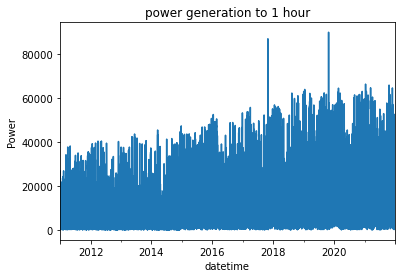

In [10]:
group_df = (energy.set_index('datetime')).resample('H')['power'].sum()
group_df.plot(kind='line')
plt.ylabel('Power')
plt.title('power generation to 1 hour')
plt.show()

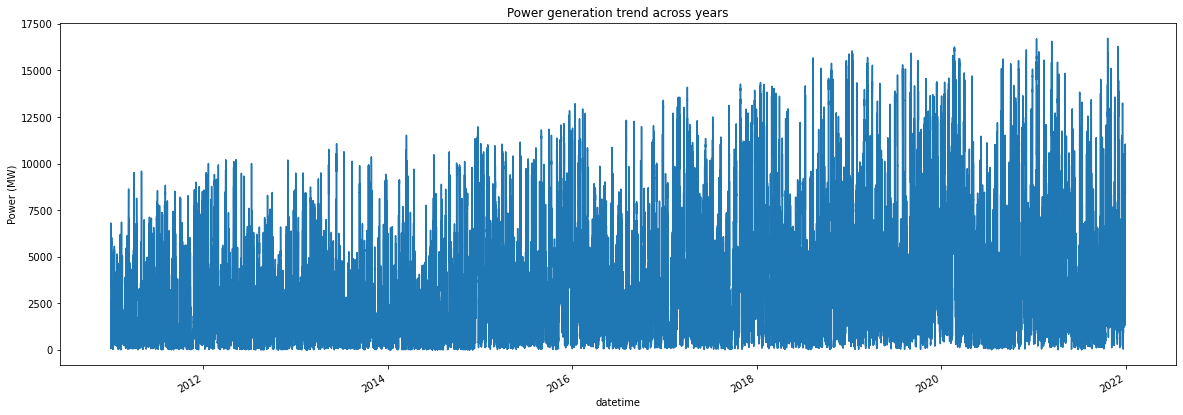

In [11]:
fig , axes = plt.subplots(1,1,figsize=(20,7))
energy.set_index('datetime')['power'].plot()
plt.ylabel('Power (MW)')
plt.title('Power generation trend across years')
plt.show()

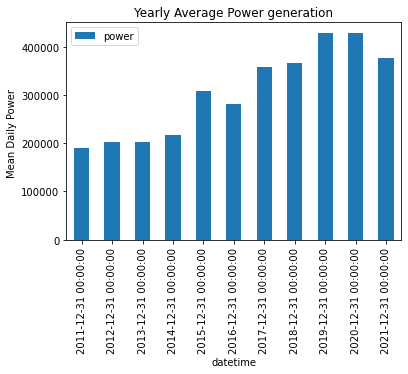

In [12]:
year_df = pd.DataFrame(energy.set_index('datetime').resample('1D')['power'].sum()).resample('1Y').mean()
year_df.plot.bar()
plt.title("Yearly Average Power generation")
plt.ylabel("Mean Daily Power ")
plt.show()

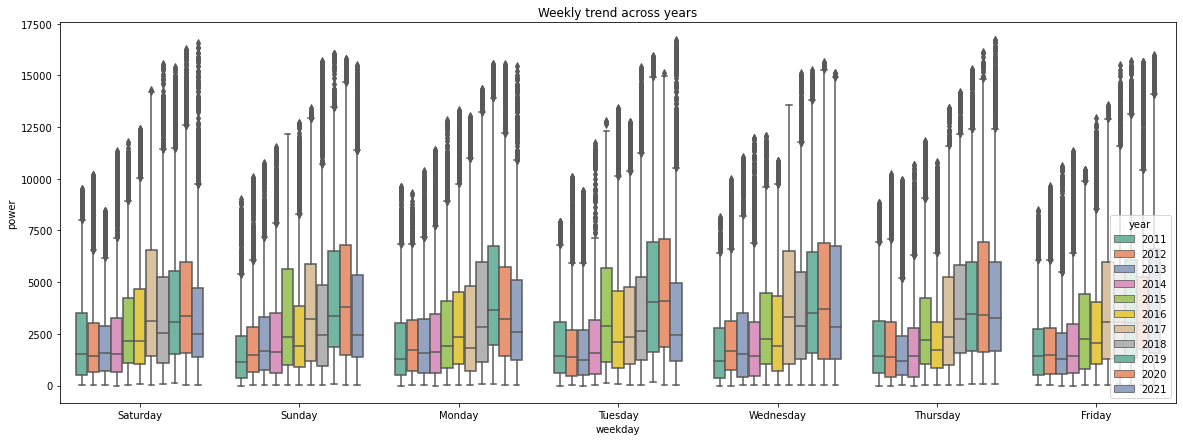

In [13]:
fig,axes = plt.subplots(1,1,figsize=(20,7))
sns.boxplot(data = energy,x='weekday',y='power',hue='year',palette='Set2',ax=axes)
plt.title('Weekly trend across years')
plt.show()

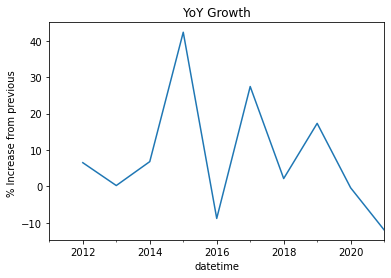

In [14]:
year_df = pd.DataFrame(energy.set_index('datetime').resample('1D')['power'].sum()).resample("1Y").mean()
year_df['shifted'] = year_df.shift(1)
year_df['YoYGrowth'] = ((year_df['power'] - year_df['shifted'])/year_df['shifted'])*100
year_df['YoYGrowth'].plot()
plt.title("YoY Growth")
plt.ylabel("% Increase from previous ")
plt.show()

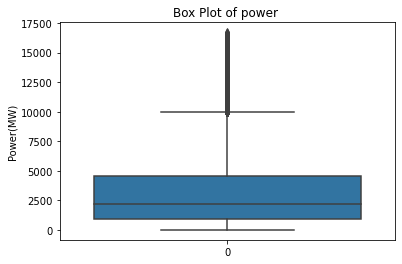

In [15]:
sns.boxplot(data=energy['power'])
plt.title('Box Plot of power ')
plt.ylabel('Power(MW)')
plt.show()

In [16]:
wind_data = energy.copy()

In [17]:
wind_data['feat_monthName'] = wind_data['datetime'].dt.month
wind_data['feat_isNight'] = (wind_data['datetime'].dt.hour>17).astype(int)
wind_data['feat_isDawn'] = ((wind_data['datetime'].dt.hour<=6) &  (wind_data['datetime'].dt.hour>=0) ).astype(int)
wind_data['feat_isMorning'] = ((wind_data['datetime'].dt.hour>6) &  (wind_data['datetime'].dt.hour<=12) ).astype(int)
wind_data['feat_isAfternoon'] = ((wind_data['datetime'].dt.hour>12) &  (wind_data['datetime'].dt.hour<=16) ).astype(int)

wind_data.head()

,datetime,power,tb,weekday,month,year,hour,feat_monthName,feat_isNight,feat_isDawn,feat_isMorning,feat_isAfternoon
0,2011-01-01 00:00:00,3416.0,1,Saturday,January,2011,00,1,0,1,0,0
1,2011-01-01 00:15:00,4755.0,2,Saturday,January,2011,00,1,0,1,0,0
2,2011-01-01 00:30:00,4939.0,3,Saturday,January,2011,00,1,0,1,0,0
3,2011-01-01 00:45:00,4939.0,4,Saturday,January,2011,00,1,0,1,0,0
4,2011-01-01 01:00:00,4998.0,5,Saturday,January,2011,01,1,0,1,0,0


In [18]:
for x in [1,12,24,48,72]:
    wind_data[f'lagged_power_{x}'] = wind_data.power.shift(x).bfill()

wind_data['rolling_4_power_mean'] = wind_data.power.rolling(4, 1).mean().shift().bfill()
wind_data['rolling_24_power_mean'] = wind_data.power.rolling(24, 1).mean().shift().bfill()

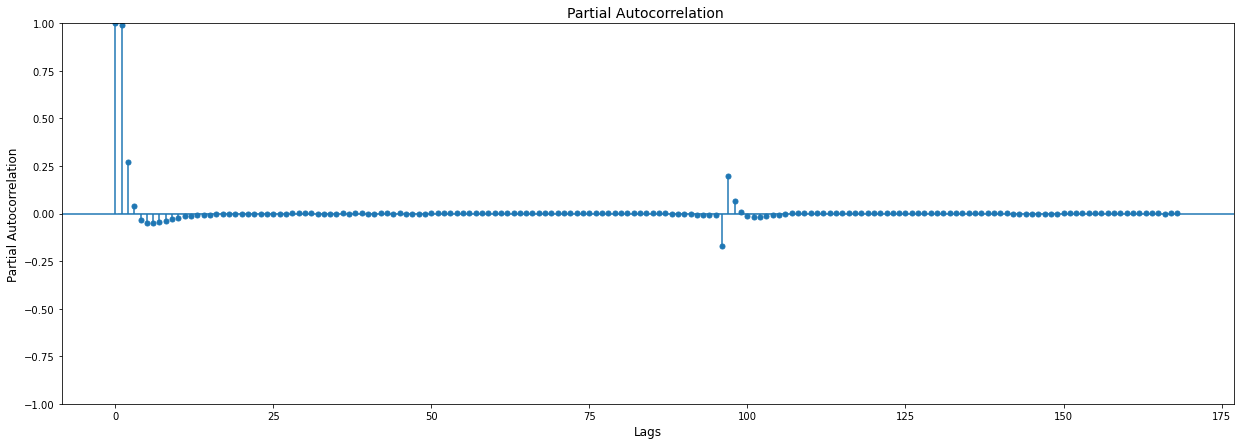

In [19]:
from statsmodels.graphics.tsaplots import plot_pacf
dataframe = wind_data.set_index('datetime')
plt.rc("figure", figsize=(21, 7))
plot_pacf(dataframe.power, lags=24*7)
plt.xlabel('Lags', fontsize=12)
plt.ylabel('Partial Autocorrelation', fontsize=12)
plt.title(f'Partial Autocorrelation ', fontsize=14)
plt.show()

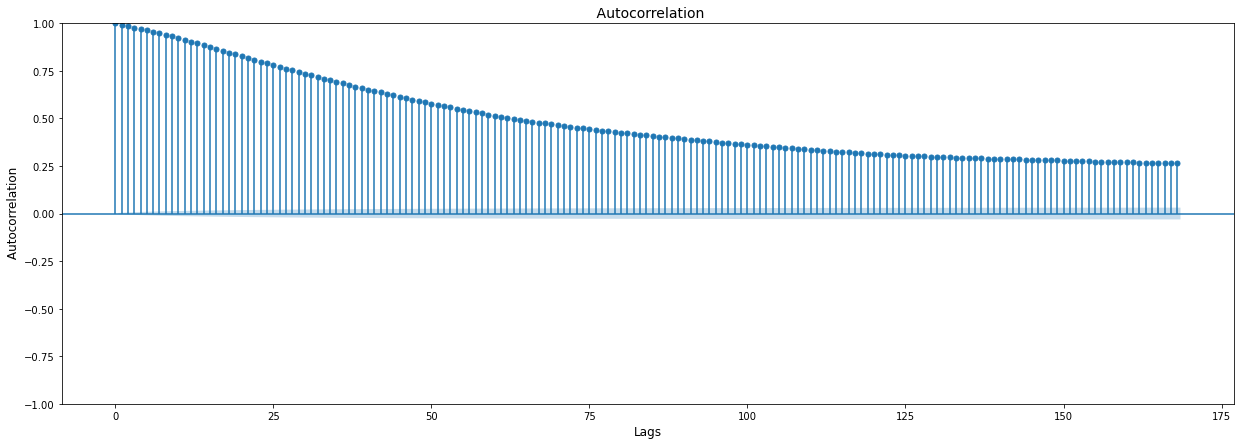

In [20]:
from statsmodels.graphics.tsaplots import plot_acf
dataframe = wind_data.set_index('datetime')
plt.rc("figure", figsize=(21, 7))
plot_acf(dataframe.power, lags=24*7)
plt.xlabel('Lags', fontsize=12)
plt.ylabel(' Autocorrelation', fontsize=12)
plt.title(f' Autocorrelation', fontsize=14)
plt.show()

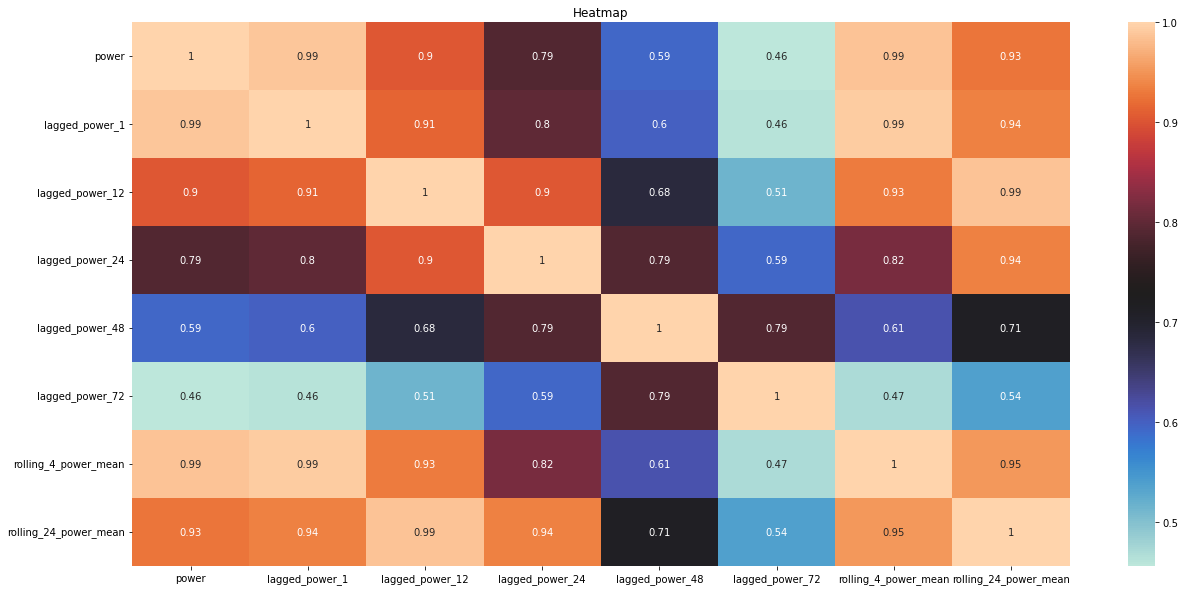

In [21]:
cor = wind_data.filter(regex='power').corr()
fig,axes = plt.subplots(1,1,figsize=(21,10))
sns.heatmap(cor,annot=True, cmap ='icefire')
plt.title('Heatmap')
plt.show()

In [22]:
print(f'All the features are {wind_data.columns}')

All the features are Index(['datetime', 'power', 'tb', 'weekday', 'month', 'year', 'hour',
       'feat_monthName', 'feat_isNight', 'feat_isDawn', 'feat_isMorning',
       'feat_isAfternoon', 'lagged_power_1', 'lagged_power_12',
       'lagged_power_24', 'lagged_power_48', 'lagged_power_72',
       'rolling_4_power_mean', 'rolling_24_power_mean'],
      dtype='object')


In [23]:
wind_data

,datetime,power,tb,weekday,month,year,hour,feat_monthName,feat_isNight,feat_isDawn,feat_isMorning,feat_isAfternoon,lagged_power_1,lagged_power_12,lagged_power_24,lagged_power_48,lagged_power_72,rolling_4_power_mean,rolling_24_power_mean
0,2011-01-01 00:00:00,3416.00,1,Saturday,January,2011,00,1,0,1,0,0,3416.00,3416.00,3416.00,3416.00,3416.00,3416.0000,3416.000000
1,2011-01-01 00:15:00,4755.00,2,Saturday,January,2011,00,1,0,1,0,0,3416.00,3416.00,3416.00,3416.00,3416.00,3416.0000,3416.000000
2,2011-01-01 00:30:00,4939.00,3,Saturday,January,2011,00,1,0,1,0,0,4755.00,3416.00,3416.00,3416.00,3416.00,4085.5000,4085.500000
3,2011-01-01 00:45:00,4939.00,4,Saturday,January,2011,00,1,0,1,0,0,4939.00,3416.00,3416.00,3416.00,3416.00,4370.0000,4370.000000
4,2011-01-01 01:00:00,4998.00,5,Saturday,January,2011,01,1,0,1,0,0,4939.00,3416.00,3416.00,3416.00,3416.00,4512.2500,4512.250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
385561,2021-12-30 06:45:00,8140.31,385562,Thursday,December,2021,06,12,0,1,0,0,8412.88,6368.56,4741.33,1373.26,2429.14,8477.2850,6624.095417
385562,2021-12-30 07:00:00,8162.33,385563,Thursday,December,2021,07,12,0,0,1,0,8140.31,6374.74,5006.83,1410.36,2360.45,8421.9200,6765.719583
385563,2021-12-30 07:15:00,8405.11,385564,Thursday,December,2021,07,12,0,0,1,0,8162.33,6685.98,5116.20,1519.73,2459.66,8329.8300,6897.198750
385564,2021-12-30 07:30:00,8503.48,385565,Thursday,December,2021,07,12,0,0,1,0,8405.11,6848.75,5251.34,1612.03,2321.49,8280.1575,7034.236667


In [24]:
train_data = pd.DataFrame()
target_ahead_timeblocks = 8 # forecasting 2 hours ahead. 
wind_data['ramp'] = wind_data['power'] - wind_data['power'].shift(target_ahead_timeblocks)
features = ['datetime', 'power','tb',\
        'feat_monthName', 'feat_isNight', 'feat_isDawn',\
       'feat_isMorning', 'feat_isAfternoon', 'lagged_power_1',\
       'lagged_power_12', 'lagged_power_24', 'lagged_power_48',\
       'lagged_power_72', 'rolling_4_power_mean', 'rolling_24_power_mean']
train_data = wind_data[features].copy()
for feature in train_data.columns:
    train_data[feature] = train_data[feature].shift(-target_ahead_timeblocks )
print(train_data.shape)
train_data.head()

(385566, 15)


,datetime,power,tb,feat_monthName,feat_isNight,feat_isDawn,feat_isMorning,feat_isAfternoon,lagged_power_1,lagged_power_12,lagged_power_24,lagged_power_48,lagged_power_72,rolling_4_power_mean,rolling_24_power_mean
0,2011-01-01 02:00:00,5509.0,9.0,1.0,0.0,1.0,0.0,0.0,5438.0,3416.0,3416.0,3416.0,3416.0,5240.25,4876.250000
1,2011-01-01 02:15:00,5638.0,10.0,1.0,0.0,1.0,0.0,0.0,5509.0,3416.0,3416.0,3416.0,3416.0,5368.00,4946.555556
2,2011-01-01 02:30:00,5582.0,11.0,1.0,0.0,1.0,0.0,0.0,5638.0,3416.0,3416.0,3416.0,3416.0,5481.50,5015.700000
3,2011-01-01 02:45:00,5792.0,12.0,1.0,0.0,1.0,0.0,0.0,5582.0,3416.0,3416.0,3416.0,3416.0,5541.75,5067.181818
4,2011-01-01 03:00:00,5962.0,13.0,1.0,0.0,1.0,0.0,0.0,5792.0,3416.0,3416.0,3416.0,3416.0,5630.25,5127.583333


In [25]:
train_data['target'] = train_data['power'].shift(-target_ahead_timeblocks)

In [26]:
valid_cutoff_date = '2021-01-01 00:00:00' # Validation Cut Off
test_cutoff = '2021-06-01 00:00:00'  # Test Cut off 
x = train_data.drop('target',1).copy()
y = train_data[['datetime','target']].copy()

In [27]:
x_train = x[x['datetime'] < valid_cutoff_date].iloc[:,1:].copy()
y_train = y[y['datetime'] < valid_cutoff_date].iloc[:,1:].copy()
x_val = x[(x['datetime']>= valid_cutoff_date) & (x['datetime']< test_cutoff)].iloc[:,1:].copy()
y_val = y[(y['datetime']>= valid_cutoff_date) & (y['datetime']< test_cutoff)].iloc[:,1:].copy()
x_test = x[x['datetime'] >= test_cutoff].iloc[:,1:].copy()
y_test = y[y['datetime'] >= test_cutoff].iloc[:,1:].copy()

In [28]:
print(f'x train: {x_train.shape}')
print(f'x validation: {x_val.shape}')
print(f'x test: {x_test.shape}')
print(f'y train: {y_train.shape}')
print(f'y validation: {y_val.shape}')
print(f'y test: {y_test.shape}')

x train: (350678, 14)
x validation: (14492, 14)
x test: (20388, 14)
y train: (350678, 1)
y validation: (14492, 1)
y test: (20388, 1)


In [29]:
def regression_metrics(y_test,y_pred):
    print("MAE:\t",round(mean_absolute_error(y_test,y_pred),4))
    print("MSE:\t",round(mean_squared_error(y_test,y_pred),4))
    print("RMSE:\t",round(np.sqrt(mean_squared_error(y_test,y_pred)),4))

In [30]:
from lightgbm import LGBMRegressor as lgr
import lightgbm as lgb
from catboost import CatBoostRegressor as cbr
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Lasso,LinearRegression,Ridge,ElasticNet
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder,StandardScaler,RobustScaler,MinMaxScaler
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV , StratifiedKFold
from sklearn.metrics import explained_variance_score,r2_score,mean_squared_error,mean_absolute_error

In [31]:
def model_validate(model, param_grid, x_train, y_train, x_test,y_test, model_name, k_folds=4, scoring='neg_mean_squared_error', fit_parameters={}):

    model_cv = GridSearchCV(model, param_grid, cv=k_folds, verbose=False, scoring= scoring, refit=True)
    model_cv.fit(x_train, y_train, **fit_parameters)
    y_train_pred = model_cv.predict(x_train)
    y_test_pred = model_cv.predict(x_test)

    print('Mean Squared Error = ', np.abs(model_cv.score(x_train, y_train)))
    print("Training metrics:")
    regression_metrics(y_train ,y_train_pred)
    
    return model_cv

In [32]:
lasso = Lasso(alpha =0.0005, random_state=20)
param_grid = [{'alpha':[0.0005,0.001, 0.005, 0.01, 0.05, 0.03, 0.1, 0.5, 1]}]

lasso_model = model_validate(lasso, param_grid, x_train, y_train, x_test, y_test, 'Lasso',k_folds=5)

Mean Squared Error =  9.825460166047069e+05
Training metrics:
MAE:	 572.5387
MSE:	 982546.0166
RMSE:	 991.2346


In [33]:
param_grid = {'learning_rate':[0.1], 'num_iterations': [10000], 'n_estimators': [25], 'num_leaves': [40],'verbose': [-1],'colsample_bytree':[0.4], 'subsample': [0.4], 'max_depth': [9]} 
lgb_model = lgr()

In [34]:
model_lgb = model_validate(lgb_model, param_grid, x_train, y_train, x_test, y_test, 'LGBM', fit_parameters={'eval_set':[(x_val, y_val)], 'eval_metric':'rmse'})

In [35]:
cat = cbr(loss_function='RMSE',learning_rate=0.01,max_depth=7,iterations=1500) 

catreg = cat.fit(x_train,y_train,verbose_eval=200,plot=True,eval_set=(x_val,y_val))
print('Model trained for horizon {}'.format(target_ahead_timeblocks))


In [36]:
predictions= lasso_model.predict(x_test)
y_test['lasso_prediction'] = predictions
predictions= model_lgb.predict(x_test)
y_test['light_gbm_prediction'] = predictions
predictions= catreg.predict(x_test)
y_test['cat_boost_prediction']=predictions

In [37]:
y_test.target = y_test.target.shift(target_ahead_timeblocks)

In [38]:
y_test[len(y_test)-target_ahead_timeblocks:len(y_test)]

,target,lasso_prediction
385550,8530.69,8833.917257
385551,8603.80,8608.278137
385552,8412.88,8390.543853
385553,8140.31,8061.277242
385554,8162.33,8086.428669
385555,8405.11,8298.523814
385556,8503.48,8447.385742
385557,8403.53,8358.888804


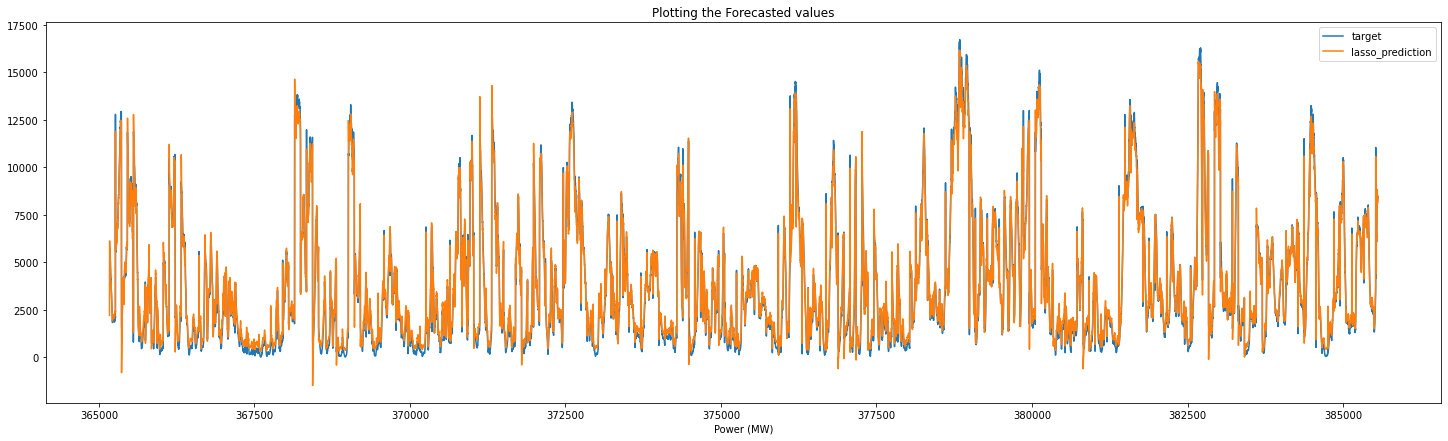

In [39]:
fig,axes = plt.subplots(1,1,figsize=(25,7))
y_test.plot(ax=axes)
plt.title('Plotting the Forecasted values')
plt.xlabel('Power (MW)')
plt.show()

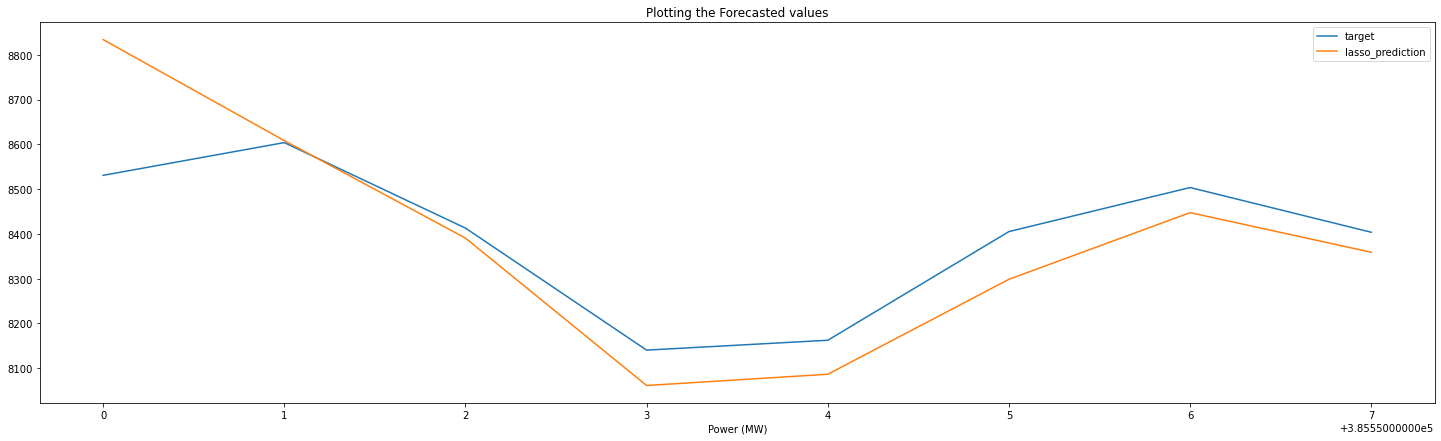

In [40]:
fig,axes = plt.subplots(1,1,figsize=(25,7))
y_test[len(y_test)-target_ahead_timeblocks:len(y_test)].plot(ax=axes)
plt.title('Plotting the Forecasted values')
plt.xlabel('Power (MW)')
plt.show()


Lasso - наиболее удачная модель для предсказания.

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet
import numpy as np 

In [42]:
df = pd.read_csv("./data.csv", parse_dates=["dt"])
df["Date"] = df["dt"].dt.date
df["Time"] = df["dt"].dt.time

In [43]:

df=df.drop("dt", axis='columns')

In [44]:
df=df.groupby(["Date"]).sum()

In [45]:
# number of future predictions
predictions = 60

# creating a specific format dataset 
df = df.reset_index()
df.columns = ['ds', 'y']
df.tail()

,ds,y
4012,2021-12-26,294921.35
4013,2021-12-27,603998.08
4014,2021-12-28,659450.45
4015,2021-12-29,241640.15
4016,2021-12-30,220220.08


In [46]:
# Инициализируем модель и обучим ее
model = Prophet()
model.fit(df)

07:44:33 - cmdstanpy - INFO - Chain [1] start processing
07:44:34 - cmdstanpy - INFO - Chain [1] done processing


In [47]:
future = model.make_future_dataframe(periods=365)
forecast = model.predict(future)

In [48]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2011-01-01,177081.129466,-17515.647296,610129.929019,177081.129466,177081.129466,127571.087296,127571.087296,127571.087296,-3494.326937,-3494.326937,-3494.326937,131065.414233,131065.414233,131065.414233,0.0,0.0,0.0,304652.216762
1,2011-01-02,177115.196459,-2154.544601,616119.308440,177115.196459,177115.196459,130796.033565,130796.033565,130796.033565,4402.686286,4402.686286,4402.686286,126393.347279,126393.347279,126393.347279,0.0,0.0,0.0,307911.230024
2,2011-01-03,177149.263452,-32338.416185,593097.601594,177149.263452,177149.263452,113457.706694,113457.706694,113457.706694,-7414.128501,-7414.128501,-7414.128501,120871.835195,120871.835195,120871.835195,0.0,0.0,0.0,290606.970146
3,2011-01-04,177183.330446,-14476.051591,603190.635662,177183.330446,177183.330446,119620.411305,119620.411305,119620.411305,5026.746783,5026.746783,5026.746783,114593.664522,114593.664522,114593.664522,0.0,0.0,0.0,296803.741751
4,2011-01-05,177217.397439,-15201.266267,619692.243278,177217.397439,177217.397439,118405.272617,118405.272617,118405.272617,10738.462343,10738.462343,10738.462343,107666.810274,107666.810274,107666.810274,0.0,0.0,0.0,295622.670056


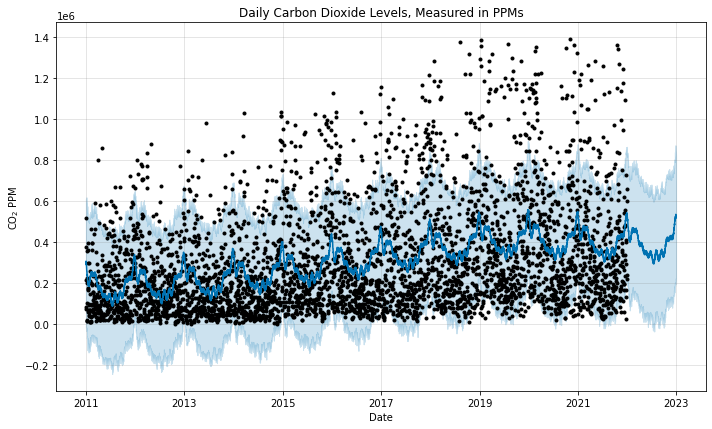

In [49]:
fig = model.plot(forecast, xlabel='Date',
                 ylabel=r'CO$_2$ PPM')
plt.title('Daily Carbon Dioxide Levels, Measured in PPMs')
plt.show()

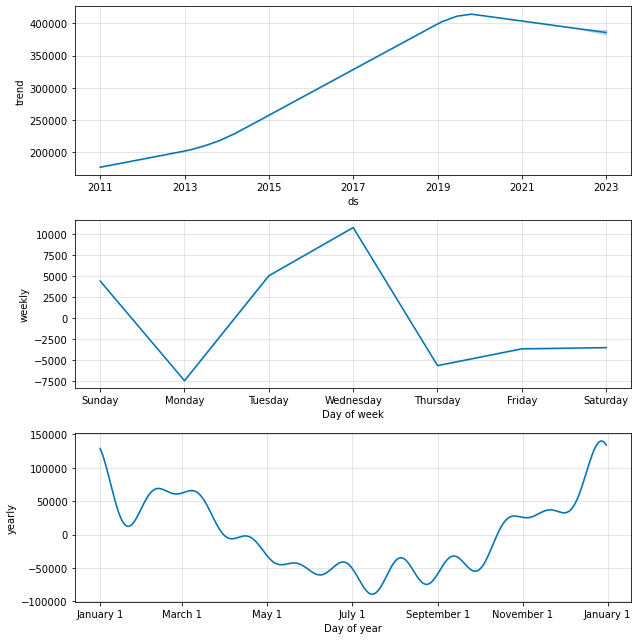

In [50]:
fig2 = model.plot_components(forecast)
plt.show()

Для данного датасета можно использовать библиотеку Facebook Prophet.